# plot_3d
plt.plot()实际上会通过plt.gca()获得当前的Axes对象ax  
有时默认的视角不是最佳的，在这种情况下我们可以使用该view_init方法来设置高程和方位角。在下面的示例中，我们将使用60度的高程（即xy平面上方60度）和35度的方位角（即绕z轴逆时针旋转35度）：  
matplotlib.cm 颜色模块  
___不要轻易用sns.set()___
***
[cmap](https://blog.csdn.net/weixin_39580795/article/details/102622004)

In [1]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all' #默认为'last'
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import os
import sys
# import seaborn as sns
from matplotlib import cm

In [3]:
#解决能显示中文
plt.rcParams['font.sans-serif']=['SimHei'] #指定默认字体 SimHei为黑体
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

## 创建一个三维的绘图工程
```
# 此处fig是二维
fig = plt.figure()
# 将二维转化为三维
axes3d = Axes3D(fig)
```
---
```
fig = plt.figure()
ax = fig.gca(projection='3d')
```
---
```
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
```



### 点
* scatter
---
### 线
* plot
* plot_wireframe

---
### 面
* plot_surface
* plot_trisurf
* contour 等高线
---
### 体
* bar
---

In [4]:
# from mpl_toolkits.mplot3d import Axes3D # 和下面一样
from mpl_toolkits.mplot3d.axes3d import Axes3D

### 3维散点图

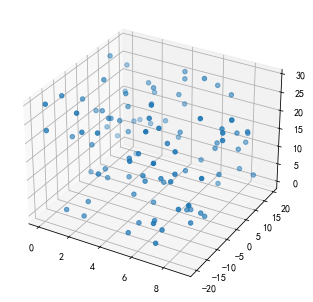

In [6]:
#绘制3维的散点图
x = np.random.randint(0,10,size=100)
y = np.random.randint(-20,20,size=100)
z = np.random.randint(0,30,size=100)
 
# 此处fig是二维
fig = plt.figure()
# 将二维转化为三维
axes3d = Axes3D(fig)
 
# axes3d.scatter3D(x,y,z)
# 效果相同
axes3d.scatter(x,y,z)

# ax = plt.axes(projection='3d') # 有了这个就显示不出来了

### 3维线性图
Axes3D.plot(xs, ys, *args, **kwargs)  

Argument|Description
:---:|:---
xs, ys|x, y coordinates of vertices
zs|z value(s), either one for all points or one for each point.
zdir|Which direction to use as z (‘x’, ‘y’ or ‘z’) when plotting a 2D set.


Text(0.5, 0, 'X')

Text(0.5, 0, 'Y')

Text(0.5, 0, 'Z')

[Text(-1, 0, 'min'), Text(0, 0, '0'), Text(1, 0, 'max')]

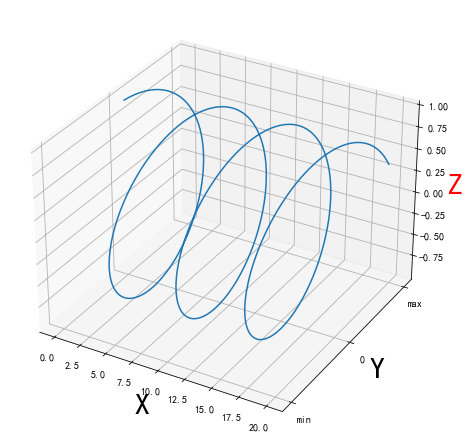

In [7]:
# 绘制三维的线性图
x = np.linspace(0,20,1000)
 
y = np.sin(x)
z = np.cos(x)
 
fig = plt.figure(figsize=(8,6))
 
axes3d = Axes3D(fig)
 
axes3d.plot(x,y,z)
 
plt.xlabel('X',size = 30)
plt.ylabel('Y',size = 30)
axes3d.set_zlabel('Z',color = 'r',size=30)
 
axes3d.set_yticks([-1,0,1])
axes3d.set_yticklabels(['min',0,'max'])

### 3维柱状图

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

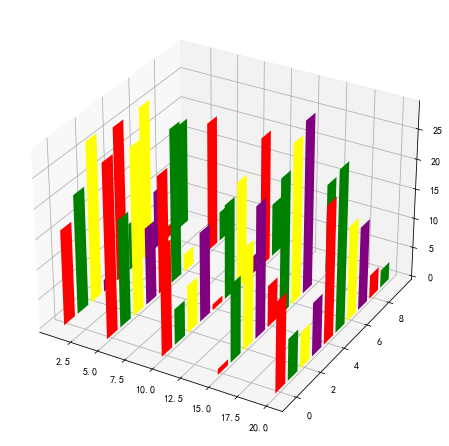

In [8]:
# 绘制三维柱状图
fig = plt.figure(figsize=(8,6))
 
axes3d = Axes3D(fig)
 
zs = [1,5,10,15,20]
 
for z in zs:
    x = np.arange(0,10)
    y = np.random.randint(0,30,size =10)
    axes3d.bar(x,y,zs = z,zdir = 'x',color=['r','green','yellow','purple'])

### 3维曲面

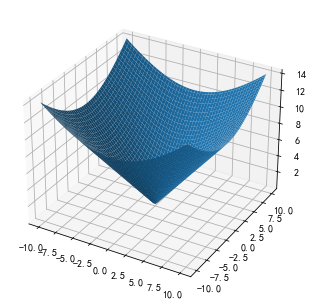

In [9]:
# 绘制三维曲面
fig = plt.figure()
 
axes3d = Axes3D(fig)
 
#!！面
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)
 
X,Y = np.meshgrid(x,y)
Z = np.sqrt(X**2+Y**2)
 
axes3d.plot_surface(X,Y,Z)

(-2.0, 2.0)

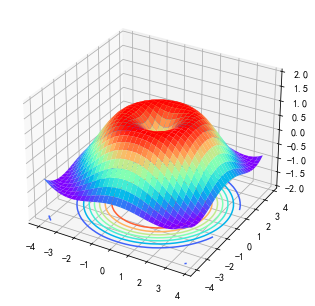

In [10]:
# 定义figure
fig = plt.figure()
# 创建3d图形的两种方式
# 将figure变为3d
ax = Axes3D(fig)

#ax = fig.add_subplot(111, projection='3d')

# 定义x, y
x = np.arange(-4, 4, 0.25)
y = np.arange(-4, 4, 0.25)

# 生成网格数据
X, Y = np.meshgrid(x, y)

# 计算每个点对的长度
R = np.sqrt(X ** 2 + Y ** 2)
# 计算Z轴的高度
Z = np.sin(R)

# 绘制3D曲面


# rstride:行之间的跨度  cstride:列之间的跨度
# rcount:设置间隔个数，默认50个，ccount:列的间隔个数  不能与上面两个参数同时出现


# cmap是颜色映射表
# from matplotlib import cm
# ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = cm.coolwarm)
# cmap = "rainbow" 亦可
# 我的理解的 改变cmap参数可以控制三维曲面的颜色组合, 一般我们见到的三维曲面就是 rainbow 的
# 你也可以修改 rainbow 为 coolwarm, 验证我的结论
ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = plt.get_cmap('rainbow'))

# 绘制从3D曲面到底部的投影,zdir 可选 'z'|'x'|'y'| 分别表示投影到z,x,y平面
# zdir = 'z', offset = -2 表示投影到z = -2上
ax.contour(X, Y, Z, zdir = 'z', offset = -2, cmap = plt.get_cmap('rainbow'))

# 设置z轴的维度，x,y类似
ax.set_zlim(-2, 2)

plt.show()


### 3维混合图形

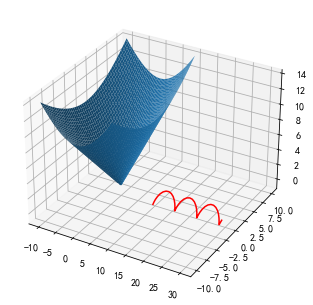

In [13]:
# 绘制混合图形
# 绘制三维曲面
fig = plt.figure()
 
axes3d = Axes3D(fig)
 
#!！面
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)
 
X,Y = np.meshgrid(x,y)
Z = np.sqrt(X**2+Y**2)

axes3d.plot_surface(X,Y,Z)
 
x = np.linspace(10,30)
y = np.sin(x)
z = np.cos(x)
axes3d.plot(x,y,z,color = 'r')

### 3维等高线

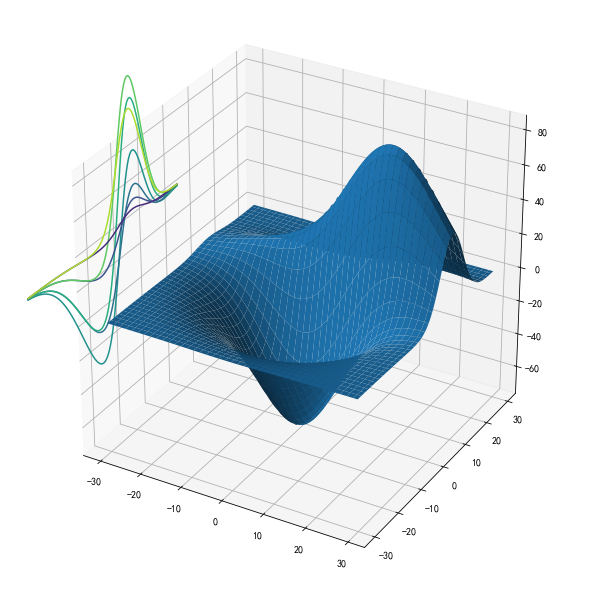

In [9]:
# 绘制等高线
# 绘制面

from mpl_toolkits.mplot3d import axes3d
 
X,Y,Z = axes3d.get_test_data()
 
fig = plt.figure(figsize=(8,8))
axes3 = Axes3D(fig)
 
# 出现图形
axes3.plot_surface(X,Y,Z)
 
# 绘制等高线
axes3.contour(X,Y,Z,zdir = 'x',offset = -50) # 投影

Text(0.5, 0, 'X')

Text(0.5, 0, 'Y')

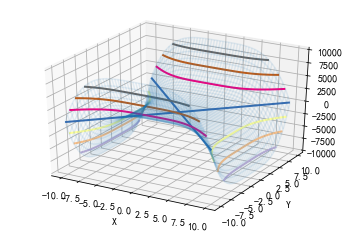

In [10]:
fig = plt.figure()
ax = fig.gca(projection='3d')

x = np.arange(-10, 10, 0.1)
y = np.arange(-10, 10, 0.1)
X, Y = np.meshgrid(x, y)

Z = np.add(-np.power(X, 4), np.power(Y, 4))

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.plot_wireframe(X, Y, Z, alpha=0.1)
ax.contour(X, Y, Z, cmap=cm.Accent, linewidths=2)

plt.show()

Text(0.5, 0, 'X')

(-6, 4)

Text(0.5, 0, 'Y')

(-4, 6)

Text(0.5, 0, 'Z')

(-3, 3)

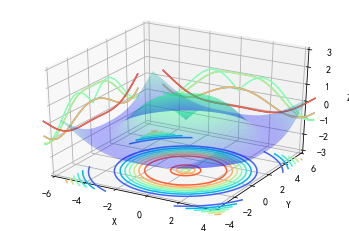

In [11]:
#定义坐标轴
fig4 = plt.figure()
ax4 = plt.axes(projection='3d')
#生成三维数据
xx = np.arange(-5,5,0.1)
yy = np.arange(-5,5,0.1)
X, Y = np.meshgrid(xx, yy)
Z = np.sin(np.sqrt(X**2+Y**2))

#作图
ax4.plot_surface(X,Y,Z,alpha=0.3,cmap='winter')    #生成表面， alpha 用于控制透明度
ax4.contour(X,Y,Z,zdir='z', offset=-3,cmap="rainbow")  #生成z方向投影，投到x-y平面
ax4.contour(X,Y,Z,zdir='x', offset=-6,cmap="rainbow")  #生成x方向投影，投到y-z平面
ax4.contour(X,Y,Z,zdir='y', offset=6,cmap="rainbow")  #生成y方向投影，投到x-z平面
#ax4.contourf(X,Y,Z,zdir='y', offset=6,cmap="rainbow")  #生成y方向投影填充，投到x-z平面，contourf()函数

#设定显示范围
ax4.set_xlabel('X')
ax4.set_xlim(-6, 4)  #拉开坐标轴范围显示投影
ax4.set_ylabel('Y')
ax4.set_ylim(-4, 6)
ax4.set_zlabel('Z')
ax4.set_zlim(-3, 3)

plt.show()

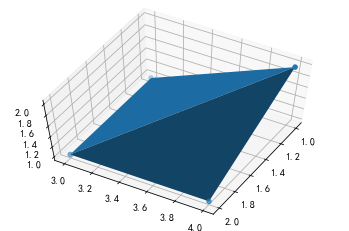

In [89]:
# 简单Demo
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# (这种方法是通过X，Y和Z构建一个矩阵，XYZ各取一个点，这里有四个点）
X = [1, 1, 2, 2]
Y = [3, 4, 4, 3]
Z = [1, 2, 1, 1]

# X = [0, 2, 2, 1]
# Y = [0, 0, 2, 1]
# Z = [0, 0, 0, 2]

# X = [0, 3, 0, 3, 1]
# Y = [0, 0, 3, 3, 1]
# Z = [0, 0, 0, 0, 2]

# 绘制曲面 (四个点可以确定一个四面体)
ax.plot_trisurf(X, Y, Z) 
# 绘制散点图
ax.scatter(X, Y, Z)
#调整观察角度和方位角。这里将俯仰角设为60度，把方位角调整为35度
ax.view_init(60, 30)
plt.show()

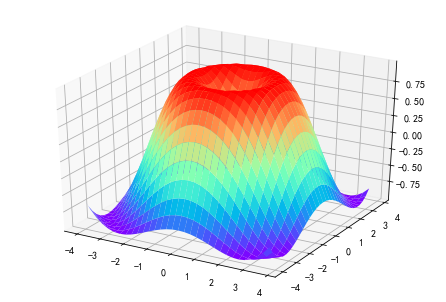

In [13]:
fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.25) 

#此处生成一维数组，也可以叫numpy向量，具体格式为 [[-4.   -3.75 -3.5  ...  3.25  3.5   3.75]
#  [-4.   -3.75 -3.5  ...  3.25  3.5   3.75]
#  [-4.   -3.75 -3.5  ...  3.25  3.5   3.75]
#  ...
#  [-4.   -3.75 -3.5  ...  3.25  3.5   3.75]
#  [-4.   -3.75 -3.5  ...  3.25  3.5   3.75]
#  [-4.   -3.75 -3.5  ...  3.25  3.5   3.75]] 这是由X生成的一维数组，同理Y也生成了这样的数组

Y = np.arange(-4, 4, 0.25)

#X ，Y合并生成numpy对象，此处相当于合并生成(X,Y) 数组，用于Z (这里是我猜测的)
X, Y = np.meshgrid(X, Y)

R = np.sqrt(X**2 + Y**2)

#生成Z对象，调用numpy的sin函数

Z = np.sin(R) 
# 具体函数方法可用 help(function) 查看，如：help(ax.plot_surface)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow')

#Demo 2 绘制三维三点图
# 绘制三维三点图
data = np.random.randint(0, 255, size=[40, 40, 40])

Text(0.5, 0, 'Z')

Text(0.5, 0, 'Y')

Text(0.5, 0, 'X')

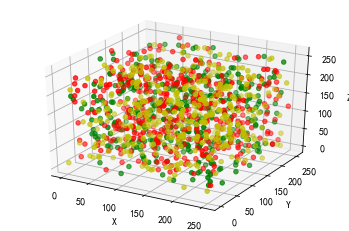

In [66]:
x, y, z = data[0], data[1], data[2]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # 创建一个三维的绘图工程
#  将数据点分成三部分画，在颜色上有区分度
ax.scatter(x[:10], y[:10], z[:10], c='y')  # 绘制数据点
ax.scatter(x[10:20], y[10:20], z[10:20], c='r')
ax.scatter(x[30:40], y[30:40], z[30:40], c='g')

ax.set_zlabel('Z')  # 坐标轴
ax.set_ylabel('Y')
ax.set_xlabel('X')

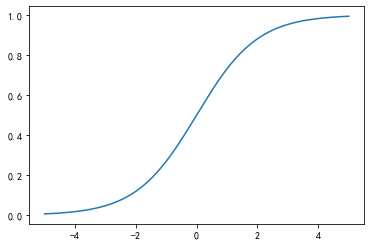

In [15]:
x=np.linspace(-5,5,1000)  #这个表示在-5到5之间生成1000个x值

y=[1/(1+np.exp(-i)) for i in x]  #对上述生成的1000个数循环用sigmoid公式求对应的y

plt.plot(x,y)  #用上述生成的1000个xy值对生成1000个点

plt.show()  #绘制图像

#### 绘制函数：梯度下降法，Loss损失函数

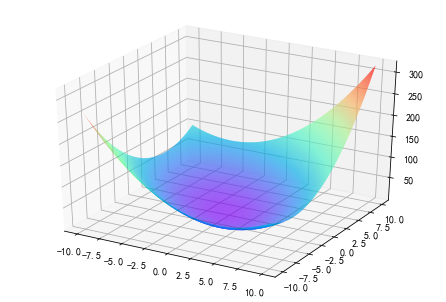

In [16]:
fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-10, 10, 0.04)
Y = np.arange(-10, 10, 0.04)
X, Y = np.meshgrid(X, Y) #必须加上这段代码
Z = (X**2 + Y**2 + X*Y + X + Y + 1)
# 具体函数方法可用 help(function) 查看，如：help(ax.plot_surface)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow')

plt.show()

Text(0.5, 0, 'x axis')

Text(0.5, 0, 'y axis')

Text(0.5, 0, 'z axis')

Text(0.5, 0.92, '3D lines\n')

Text(0.5, 0, 'x axis')

Text(0.5, 0, 'y axis')

Text(0.5, 0, 'z axis')

Text(0.5, 0.92, '3D scatters\n')

Text(0.5, 0, 'x axis')

Text(0.5, 0, 'y axis')

Text(0.5, 0, 'z axis')

Text(0.5, 0.92, '3D bars\n')

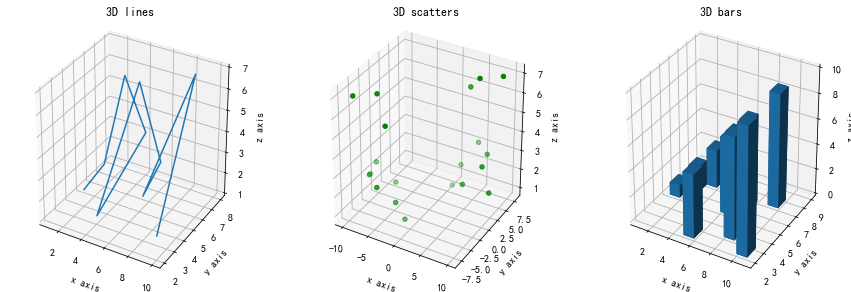

In [17]:
fig = plt.figure(figsize=(15, 5))

# ax1, 3D lines 折线图
ax1 = fig.add_subplot(131, projection='3d')

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [5, 6, 7, 8, 2, 5, 6, 3, 7, 2]
z = np.array([[1, 2, 6, 3, 2, 7, 3, 3, 7, 2]])

ax1.plot_wireframe(x, y, z)  # z 必须要是2维 np array

ax1.set_xlabel('x axis')
ax1.set_ylabel('y axis')
ax1.set_zlabel('z axis')

ax1.set_title('3D lines\n')

## ax2, 3D scatters 散点图
ax2 = fig.add_subplot(132, projection='3d')

x2 = [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10]
y2 = [-5, -6, -7, -8, -2, -5, -6, -3, -7, -2]
z2 = [1, 2, 6, 3, 2, 7, 3, 3, 7, 2]

ax2.scatter(x, y, z, c='g', marker='o')
ax2.scatter(x2, y2, z2, c='g', marker='o')

ax2.set_xlabel('x axis')
ax2.set_ylabel('y axis')
ax2.set_zlabel('z axis')

ax2.set_title('3D scatters\n')

## ax3, 3D bar 条形图
ax3 = fig.add_subplot(133, projection='3d')

x3 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y3 = [5, 6, 7, 8, 2, 5, 6, 3, 7, 2]
z3 = np.zeros(10)  # z3 暂不赋值，下面 dz 直接设置 height

# dx,dy,dz: The width, depth, and height of the bars, respectively
dx = np.ones(10)
dy = np.ones(10)
dz = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

ax3.bar3d(x3, y3, z3, dx, dy, dz)

ax3.set_xlabel('x axis')
ax3.set_ylabel('y axis')
ax3.set_zlabel('z axis')

ax3.set_title('3D bars\n')

plt.show()

## 点线面体

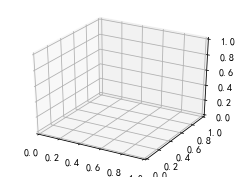

In [18]:
from matplotlib import cm
plt.rcParams['legend.fontsize'] = 20  # mpl模块载入的时候加载配置信息存储在rcParams变量中，rc_params_from_file()函数从文件加载配置信息
font = {
    'color': 'b',
    'style': 'oblique',
    'size': 20,
    'weight': 'bold'
}
fig = plt.figure(figsize=(4, 3))  #参数为图片大小
ax = fig.gca(projection='3d')  # get current axes，且坐标轴是3d的
# 报错
# ax.set_aspect('equal')  # 坐标轴间比例一致 


Text(0.5, 0, 'X axis')

Text(0.5, 0, 'Y axis')

Text(0.5, 0, 'Z axis')

Text(0.5, 0.92, 'Scatter plot')

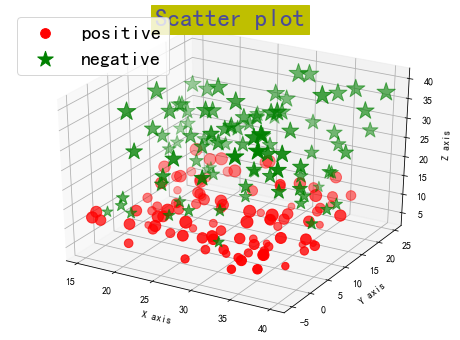

In [19]:
fig = plt.figure(figsize=(8, 6))  #参数为图片大小
ax = fig.gca(projection='3d')  # get current axes，且坐标轴是3d的

n = 100

def randrange(n, vmin, vmax):
    r = np.random.rand(n)  # 随机生成n个介于0~1之间的数
    return (vmax - vmin) * r + vmin  # 得到n个[vmin,vmax]之间的随机数

for zlow, zhigh, c, m, l in [(4, 15, 'r', 'o', 'positive'), (13, 40, 'g', '*', 'negative')]:  # 用两个tuple，是为了将形状和颜色区别开来
    x = randrange(n, 15, 40)
    y = randrange(n, -5, 25)
    z = randrange(n, zlow, zhigh)
    ax.scatter(x, y, z, c=c, marker=m, label=l, s=z * 10) #这里marker的尺寸和z的大小成正比

ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
ax.set_zlabel("Z axis")
ax.set_title("Scatter plot", alpha=0.6, color="b", size=25, weight='bold', backgroundcolor="y")   #子图的title
ax.legend(loc="upper left")    #legend的位置左上

# plt.show()

Text(0.5, 0, 'X')

Text(0.5, 0, 'Y')

Text(0.5, 0, 'Z')

Text(0.5, 0.92, 'Line Plot')

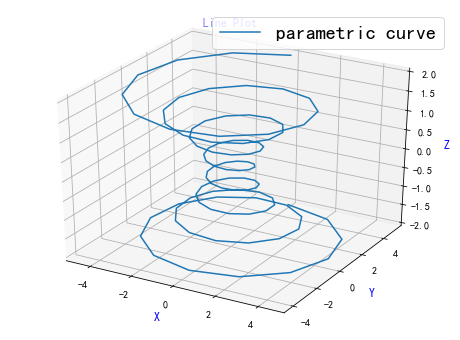

In [20]:
font = {
    'color': 'b',
    'style': 'oblique',
    'size': 12,
    'weight': 'bold'
}
fig = plt.figure(figsize=(8, 6))  #参数为图片大小
ax = fig.gca(projection='3d')  # get current axes，且坐标轴是3d的
# 准备数据
theta = np.linspace(-8 * np.pi, 8 * np.pi, 100)  # 生成等差数列，[-8π,8π]，个数为100
z = np.linspace(-2, 2, 100)  # [-2,2]容量为100的等差数列，这里的数量必须与theta保持一致，因为下面要做对应元素的运算
r = z ** 2 + 1
x = r * np.sin(theta)  # [-5,5]
y = r * np.cos(theta)  # [-5,5]
ax.set_xlabel("X", fontdict=font)
ax.set_ylabel("Y", fontdict=font)
ax.set_zlabel("Z", fontdict=font)
ax.set_title("Line Plot", alpha=0.5, fontdict=font) #alpha参数指透明度transparent
ax.plot(x, y, z, label='parametric curve')
ax.legend(loc='upper right') #legend的位置可选：upper right/left/center,lower right/left/center,right,left,center,best等等
plt.show()

(-1, 1)

Text(0.5, 0, 'x')

Text(0.5, 0, 'y')

Text(0.5, 0, 'z')

Text(0.5, 0.92, 'Surface plot')

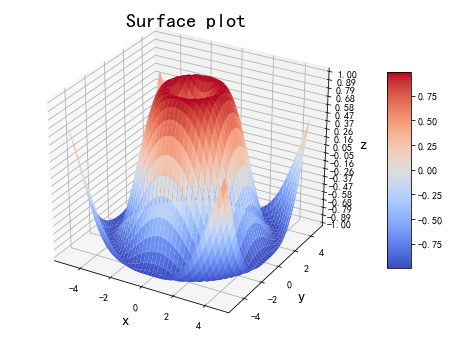

In [21]:
from matplotlib.ticker import LinearLocator, FormatStrFormatter
fig = plt.figure(figsize=(8, 6))  #参数为图片大小
ax = fig.gca(projection='3d')  # get current axes，且坐标轴是3d的
# 准备数据
x = np.arange(-5, 5, 0.25)    #生成[-5,5]间隔0.25的数列，间隔越小，曲面越平滑
y = np.arange(-5, 5, 0.25)
x, y = np.meshgrid(x,y)  #格点矩阵,原来的x行向量向下复制len(y)次，形成len(y)*len(x)的矩阵，即为新的x矩阵；原来的y列向量向右复制len(x)次，形成len(y)*len(x)的矩阵，即为新的y矩阵；新的x矩阵和新的y矩阵shape相同
r = np.sqrt(x ** 2 + y ** 2)
z = np.sin(r)

surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm)  # cmap指color map

# 自定义z轴
ax.set_zlim(-1, 1)
ax.zaxis.set_major_locator(LinearLocator(20))  # z轴网格线的疏密，刻度的疏密，20表示刻度的个数
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))  # 将z的value字符串转为float，保留2位小数

#设置坐标轴的label和标题
ax.set_xlabel('x',size=15)
ax.set_ylabel('y',size=15)
ax.set_zlabel('z',size=15)
ax.set_title("Surface plot", weight='bold', size=20)

#添加右侧的色卡条
fig.colorbar(surf, shrink=0.6, aspect=8)  # shrink表示整体收缩比例，aspect仅对bar的宽度有影响，aspect值越大，bar越窄
plt.show()

Text(0.5, 0, 'X')

(-0.5, 1.5)

Text(0.5, 0, 'Y')

(-0.5, 1.5)

Text(0.5, 0, 'Z')

(-0.5, 1.5)

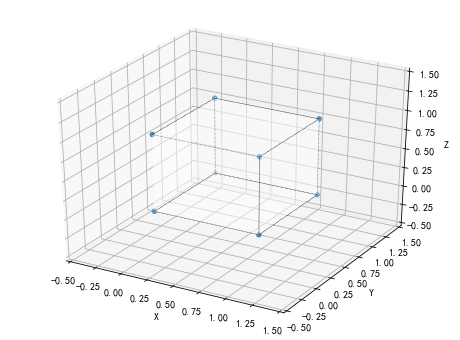

In [22]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
fig = plt.figure(figsize=(8, 6))  #参数为图片大小
ax = fig.gca(projection='3d')  # get current axes，且坐标轴是3d的
# 六面体顶点和面
verts = [(0, 0, 0), (0, 1, 0), (1, 1, 0), (1, 0, 0), (0, 0, 1), (0, 1, 1), (1, 1, 1), (1, 0, 1)]
faces = [[0, 1, 2, 3], [4, 5, 6, 7], [0, 1, 5, 4], [1, 2, 6, 5], [2, 3, 7, 6], [0, 3, 7, 4]]

# 四面体顶点和面
# verts = [(0, 0, 0), (1, 0, 0), (1, 1, 0), (1, 0, 1)]
# faces = [[0, 1, 2], [0, 1, 3], [0, 2, 3], [1, 2, 3]]

# 获得每个面的顶点
poly3d = [[verts[vert_id] for vert_id in face] for face in faces]
 
# 绘制顶点
x, y, z = zip(*verts)
ax.scatter(x, y, z)
# 绘制多边形面
ax.add_collection3d(Poly3DCollection(poly3d, facecolors='w', linewidths=1, alpha=0.3))
# 绘制多边形的边
ax.add_collection3d(Line3DCollection(poly3d, colors='k', linewidths=0.5, linestyles=':'))
 
 # 设置图形坐标范围
ax.set_xlabel('X')
ax.set_xlim3d(-0.5, 1.5)
ax.set_ylabel('Y')
ax.set_ylim3d(-0.5, 1.5)
ax.set_zlabel('Z')
ax.set_zlim3d(-0.5, 1.5)
plt.show()

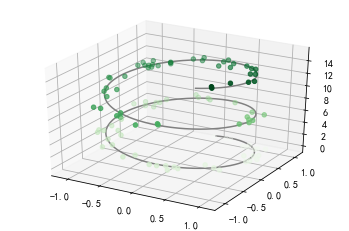

In [63]:
#绘制三角螺旋线

ax = plt.axes(projection='3d')

#三维线的数据
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# 三维散点的数据
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')


### 三维等高线图/三维轮廓图
类似于我们在密度和等高线图中探索的等高线图，mplot3d包含使用相同输入创建三维浮雕图的工具。与二维ax.contour图一样，ax.contour3D要求所有输入数据都采用二维规则网格的形式，并在每个点评估Z数据。这里我们将展示一个三维正弦函数的三维等高线图：  
有时默认的视角不是最佳的，在这种情况下我们可以使用该view_init方法来设置高程和方位角。在下面的示例中，我们将使用60度的高程（即xy平面上方60度）和35度的方位角（即绕z轴逆时针旋转35度）：

Text(0.5, 0, 'x')

Text(0.5, 0, 'y')

Text(0.5, 0, 'z')

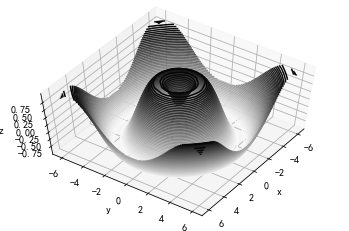

In [53]:
def fun1(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))
x = np.linspace(-6,6,30)
y = np.linspace(-6,6,30)
X, Y = np.meshgrid(x, y)
Z = fun1(X,Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
#调整观察角度和方位角。这里将俯仰角设为60度，把方位角调整为35度
ax.view_init(60, 35)

### 线框图和全面图

Text(0.5, 0.92, 'wireframe')

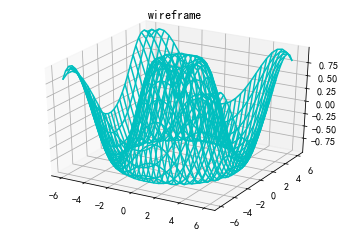

In [54]:
#线框图
fig =plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='c')
ax.set_title('wireframe')

Text(0.5, 0.92, 'surface')

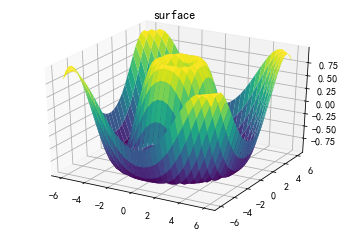

In [55]:
#曲面图
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('surface')

##### np.meshgrid

In [91]:
xx = np.arange(10)
yy = np.arange(10)
np.meshgrid(xx,yy)

[array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]),
 array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
        [7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
        [8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
        [9, 9, 9, 9, 9, 9, 9, 9, 9, 9]])]

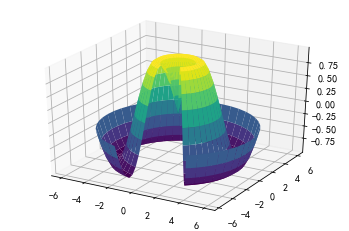

In [90]:
#使用极坐标可以获得切片的效果
def fun1(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)
X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = fun1(X, Y)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')


### 曲面三角剖分/三角形曲面图(trisurf)
* 语法  
    trisurf(Tri,X,Y,Z,C)   
    trisurf(Tri,X,Y,Z)  
    trisurf(TR)   
    trisurf(...'PropertyName',PropertyValue...)   
    h = trisurf(...)  

* 说明  
    trisurf(Tri,X,Y,Z,C) 将 m×3 面矩阵 Tri 中定义的三角形显示为曲面。Tri 的每一行都定义了三角形的一个面，其实现方式是对包含 X、Y 和 Z 顶点的向量或矩阵进行索引，以此来定义面。颜色通过向量 C 定义。  
    trisurf(Tri,X,Y,Z) 使用 C=Z，因此颜色与曲面高度成比例。  
    trisurf(TR) 以三角剖分表示法显示三角形。它使用 C = TR.Points(:,3) 来使曲面颜色与高度成比例。  
    trisurf(...'PropertyName',PropertyValue...) 为函数创建的补片图形对象指定其他补片属性名称和值。  
    h = trisurf(...) 返回一个补片句柄。  

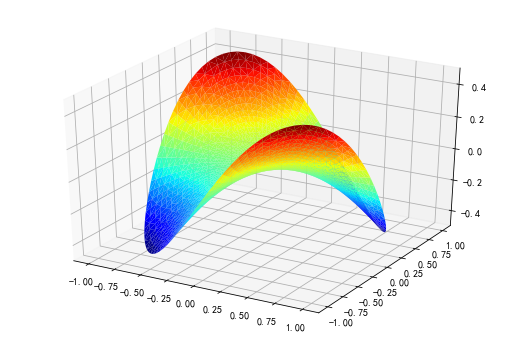

In [58]:
n_angles = 100                #曲面衔接角度（平滑度）
n_radii = 20                   #鞍部半径（1：锐角，20：平滑角）
fig = plt.figure(figsize=((9,6)))
ax = fig.gca(projection='3d')
radii = np.linspace(0.125, 1.0, n_radii)
angles = np.linspace(0, 2 * np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
x = np.append(0, (radii * np.cos(angles)).flatten())
y = np.append(0, (radii * np.sin(angles)).flatten())
z = np.sin(-x * y)
ax.plot_trisurf(x, y, z,
                cmap=cm.jet,    #曲面颜色
                linewidth=0.2)
plt.show()

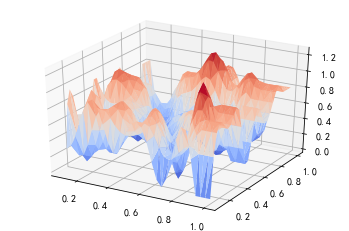

In [59]:
from scipy import interpolate
#生成数据
x = np.linspace(0.1,0.9,9)
y = np.linspace(0.1,0.9,9)
z = np.random.rand(81)

#插值
# xx, yy = np.meshgrid(x, y)

f1 = interpolate.interp2d(x, y, z, kind='cubic')
xnew = np.arange(0.1, 1, 0.03)
ynew = np.arange(0.1, 1, 0.03)
znew = f1(xnew, ynew)

#修改x,y，z输入画图函数前的shape
xx1, yy1 = np.meshgrid(xnew, ynew)
newshape = (xx1.shape[0])*(xx1.shape[0])
y_input = xx1.reshape(newshape)
x_input = yy1.reshape(newshape)
z_input = znew.reshape(newshape)

#画图
# sns.set(style='white') # 会使很多图出白线
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(x_input,y_input,z_input,cmap=cm.coolwarm)
plt.show()

##### np.ravel()和np.flatten()
两者的功能是一致的，将多维数组降为一维，但是两者的区别是返回拷贝还是返回视图，np.flatten(0返回一份拷贝，对拷贝所做修改不会影响原始矩阵，而np.ravel()返回的是视图，修改时会影响原始矩阵   

(1000,)

(1000,)

(1000,)

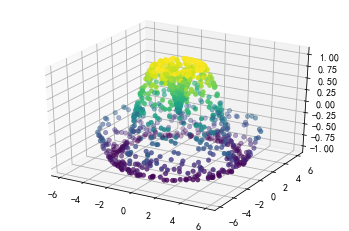

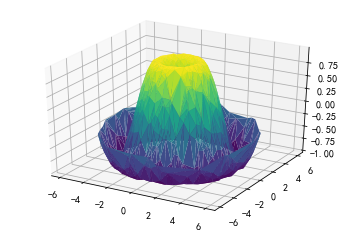

In [60]:
def fun2(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = fun2(x, y)
x.shape
y.shape
z.shape
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5)
plt.show()
#上图还有许多地方需要修补，这些工作可以由ax.plot_trisurf函数帮助我们完成。它首先找到一组所有点都连接起来的三角形，然后用这些三角形创建曲面, （请记住，x，y和z这里是一维数组）
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none')

#### 莫比乌斯带（应用曲面三角剖分）

(-1, 1)

(-1, 1)

(-1, 1)

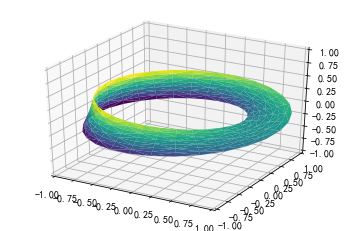

In [61]:
#绘制莫比乌斯带
#由于它是一条二维带，因此需要两个内在维度。theta维度取值范围是0～2pi，宽度维度w取值范围是-1～1
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)
phi = 0.5 * theta
#x-y平面内的半径
r = 1 + w * np.cos(phi)

x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))

#要画出莫比乌斯带，还必须保证三角部分是正确的。最好的方法是首先用基本参数化方法定义三角部分，然后用Matplotlib将
#这个三角剖分映射到莫比乌斯带的三维空间里
from matplotlib.tri import Triangulation
tri = Triangulation(np.ravel(w), np.ravel(theta))
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles, cmap='viridis', linewidth=0.2)
ax.set_xlim(-1, 1);ax.set_ylim(-1,1);ax.set_zlim(-1,1)

### 折线图
Axes3D.plot(xs, ys, *args, **kwargs)  

Argument|Description
:---:|:---
xs, ys|x, y coordinates of vertices
zs|z value(s), either one for all points or one for each point.
zdir|Which direction to use as z (‘x’, ‘y’ or ‘z’) when plotting a 2D set.


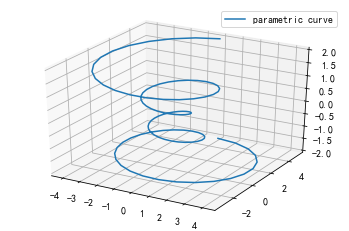

In [94]:
# import matplotlib as mpl
# mpl.rcParams['legend.fontsize'] = 10
plt.rcParams['legend.fontsize'] = 10
 
fig = plt.figure()
ax = fig.gca(projection='3d')
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z ** 2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)
ax.plot(x, y, z, label='parametric curve')
ax.legend()
 
plt.show()

### 散点图
Axes3D.scatter(xs, ys, zs=0, zdir='z', s=20, c=None, depthshade=True, *args, **kwargs)  

Argument|	Description
:---:|:---
xs, ys|	Positions of data points.
zs|	Either an array of the same length as xs and ys or a single value to place all points in the same plane. Default is 0.
zdir|	Which direction to use as z (‘x’, ‘y’ or ‘z’) when plotting a 2D set.
s|	Size in points^2. It is a scalar or an array of the same length as x and y.
c|	A color. c can be a single color format string, or a sequence of color specifications of length N, or a sequence of N numbers to be mapped to colors using the cmap and norm specified via kwargs (see below). Note that c| should not be a single numeric RGB or RGBA sequence because that is indistinguishable from an array of values to be colormapped. c can be a 2-D array in which the rows are RGB or RGBA, however, including the case of a single row to specify the same color for all points.
depthshade|	Whether or not to shade the scatter markers to give the appearance of depth. Default is True.

Text(0.5, 0, 'X Label')

Text(0.5, 0, 'Y Label')

Text(0.5, 0, 'Z Label')

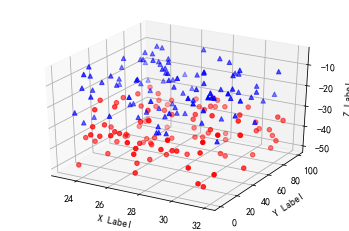

In [37]:
def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin) * np.random.rand(n) + vmin


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

### 线框图
Axes3D.plot_wireframe(X, Y, Z, *args, **kwargs) 

Argument|Description
:---:|:---:
X, Y,|Data values as 2D arrays
Z| 
rstride|Array row stride (step size), defaults to 1
cstride	|Array column stride (step size), defaults to 1
rcount|Use at most this many rows, defaults to 50
ccount|	Use at most this many columns, defaults to 50

Text(0.5, 0, 'X')

Text(0.5, 0, 'Y')

Text(0.5, 0, 'Z')

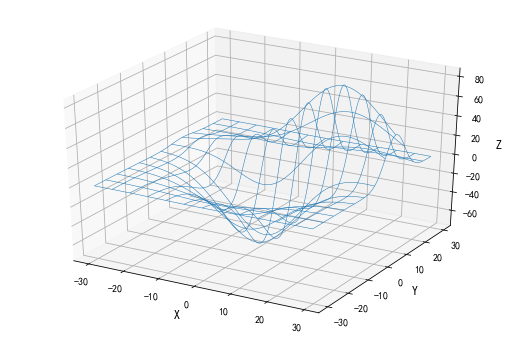

In [38]:
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure(figsize=(9,6))
ax3d = fig.add_subplot(111, projection='3d')
 
# Grab some test data.
X, Y, Z = axes3d.get_test_data(0.05)

ax3d.set_xlabel('X', fontsize=12)
ax3d.set_ylabel('Y', fontsize=12)
ax3d.set_zlabel('Z', fontsize=12)

# Plot a basic wireframe.
ax3d.plot_wireframe(X, Y, Z, rstride=10, cstride=10,linewidth=0.5,cmap='jet')
 
plt.show()

<Figure size 432x288 with 0 Axes>

Text(0.5, 0.92, '3D Wireframe')

Text(0.5, 0, 'X')

Text(0.5, 0, 'y')

Text(0.5, 0, 'z')

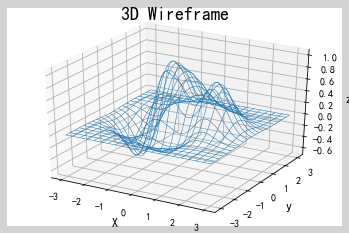

In [39]:
plt.figure('3D Wireframe', facecolor='lightgray')
ax3d = plt.gca(projection='3d')
n = 1000
x, y = np.meshgrid(np.linspace(-3, 3, n), np.linspace(-3, 3, n))
z = (1 - x / 2 + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)

plt.title('3D Wireframe', fontsize=18)
plt.grid(linestyle=":")

ax3d.set_xlabel('X', fontsize=12)
ax3d.set_ylabel('y', fontsize=12)
ax3d.set_zlabel('z', fontsize=12)

ax3d.plot_wireframe(x, y, z, rstride=50, cstride=50, linewidth=0.5, cmap='jet')


### 表面图
Axes3D.plot_surface(X, Y, Z, *args, **kwargs)  

Argument|Description
:---:|:---
X, Y, Z|Data values as 2D arrays
rstride|Array row stride (step size)
cstride|Array column stride (step size)
rcount|Use at most this many rows, defaults to 50
ccount|Use at most this many columns, defaults to 50
color|Color of the surface patches
cmap|A colormap for the surface patches.
facecolors|Face colors for the individual patches
norm|An instance of Normalize to map values to colors
vmin|Minimum value to map
vmax|Maximum value to map
shade|Whether to shade the facecolors



(-1.01, 1.01)

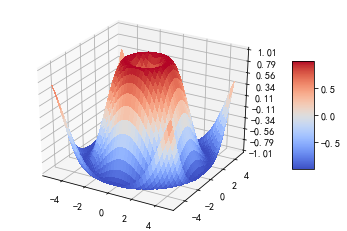

In [40]:
# from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax = fig.gca(projection='3d')
 
# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X ** 2 + Y ** 2)
Z = np.sin(R)
 
# Plot the surface.
# surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, antialiased=False)
 
# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
 
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
 
plt.show()

Text(0.5, 0.92, '3D Surface')

Text(0.5, 0, 'X')

Text(0.5, 0, 'y')

Text(0.5, 0, 'z')

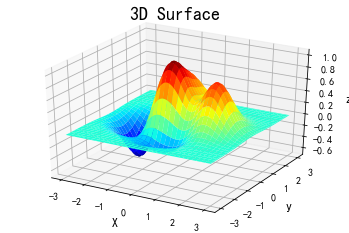

In [41]:
# 这两行代码要先写
fig = plt.figure()
ax3d = fig.gca(projection='3d')

n = 1000
# x,y,z为二位数组

x, y = np.meshgrid(np.linspace(-3, 3, n), np.linspace(-3, 3, n))
z = (1 - x / 2 + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)

plt.title('3D Surface', fontsize=18)
plt.grid(linestyle=":")

ax3d.set_xlabel('X', fontsize=12)
ax3d.set_ylabel('y', fontsize=12)
ax3d.set_zlabel('z', fontsize=12)

ax3d.plot_surface(x, y, z, rstride=30, cstride=30, cmap='jet')

plt.show()

Text(0.5, 0.92, '山区图')

Text(0.5, 0, 'X')

Text(0.5, 0, 'Y')

Text(0.5, 0, 'Z')

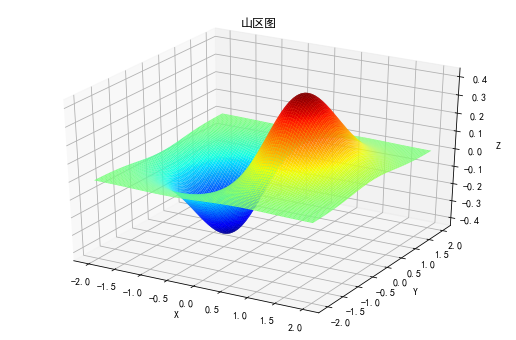

In [42]:
# ax3d = plt.subplot(111, projection='3d') # 这个写法可以运行但不好
fig = plt.figure(figsize=(9,6))
ax3d = fig.gca(projection='3d')

x,y = np.mgrid[-2:2:100j,-2:2:100j] #100j为设置曲面平滑度
z=x*np.exp(-x**2-y**2)

ax3d.set_title('山区图');
# ax3d.plot_surface(x,y,z,rstride=1, cstride=1, linewidth=0, cmap=cm.jet)
ax3d.plot_surface(x,y,z,rstride=1, cstride=1,  cmap=cm.jet)

ax3d.set_xlabel('X')                #设置坐标轴标签
ax3d.set_ylabel('Y')
ax3d.set_zlabel('Z')
plt.show()

### 柱状图
Axes3D.bar(left, height, zs=0, zdir='z', *args, **kwargs)

Argument|Description
:---:|:---
left|The x coordinates of the left sides of the bars.
height|The height of the bars.
zs|Z coordinate of bars, if one value is specified they will all be placed at the same z.
zdir|Which direction to use as z (‘x’, ‘y’ or ‘z’) when plotting a 2D set.


<BarContainer object of 20 artists>

<BarContainer object of 20 artists>

<BarContainer object of 20 artists>

<BarContainer object of 20 artists>

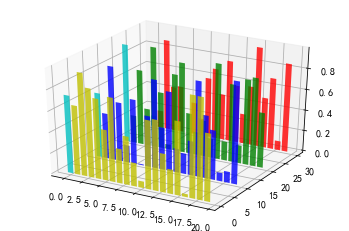

In [96]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for c, z in zip(['r', 'g', 'b', 'y'], [30, 20, 10, 0]):
    xs = np.arange(20)
    ys = np.random.rand(20)
 
    # You can provide either a single color or an array. To demonstrate this,
    # the first bar of each set will be colored cyan.
    cs = [c] * len(xs)
    cs[0] = 'c'
    ax.bar(xs, ys, zs=z, zdir='y', color=cs, alpha=0.8)
    
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
 
plt.show()

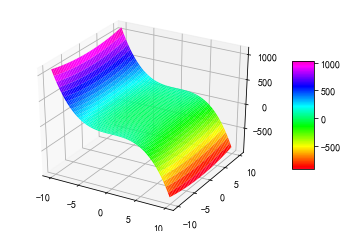

In [44]:
fig = plt.figure()
ax = fig.gca(projection='3d')

x = np.arange(-10, 10, 0.1)
y = np.arange(-10, 10, 0.1)
X, Y = np.meshgrid(x, y)

Z = np.add(-np.power(X, 3), np.power(Y, 2))

surf = ax.plot_surface(X, Y, Z, cmap=cm.gist_rainbow)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

### 箭头图
Axes3D.quiver(*args, **kwargs)  
* X, Y, Z:  
    The x, y and z coordinates of the arrow locations (default is tail of arrow; see pivot kwarg)
* U, V, W:  
    The x, y and z components of the arrow vectors

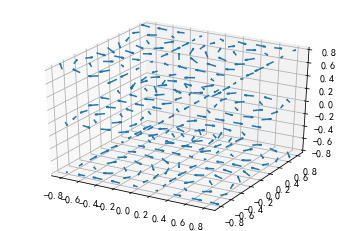

In [46]:
fig = plt.figure()
ax = fig.gca(projection='3d')
 
# Make the grid
x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.8))
 
# Make the direction data for the arrows
u = np.sin(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z)
v = -np.cos(np.pi * x) * np.sin(np.pi * y) * np.cos(np.pi * z)
w = (np.sqrt(2.0 / 3.0) * np.cos(np.pi * x) * np.cos(np.pi * y) *
     np.sin(np.pi * z))
 
ax.quiver(x, y, z, u, v, w, length=0.1, normalize=True)
 
plt.show()

### 2d转3d图

(0, 1)

(0, 1)

(0, 1)

Text(0.5, 0, 'X')

Text(0.5, 0, 'Y')

Text(0.5, 0, 'Z')

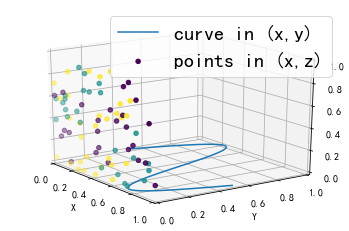

In [47]:
fig = plt.figure()
ax = fig.gca(projection='3d')
 
# Plot a sin curve using the x and y axes.
x = np.linspace(0, 1, 100)
y = np.sin(x * 2 * np.pi) / 2 + 0.5
ax.plot(x, y, zs=0, zdir='z', label='curve in (x,y)')
 
# Plot scatterplot data (20 2D points per colour) on the x and z axes.
colors = ('r', 'g', 'b', 'k')
x = np.random.sample(20 * len(colors))
y = np.random.sample(20 * len(colors))
labels = np.random.randint(3, size=80)
 
# By using zdir='y', the y value of these points is fixed to the zs value 0
# and the (x,y) points are plotted on the x and z axes.
ax.scatter(x, y, zs=0, zdir='y', c=labels, label='points in (x,z)')
 
# Make legend, set axes limits and labels
ax.legend()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
 
# Customize the view angle so it's easier to see that the scatter points lie
# on the plane y=0
ax.view_init(elev=20., azim=-35)
 
plt.show()

### 文本图

Text(1, 2, '(1, 2, 10), dir=None')

Text(4, 5, '(4, 5, 3), dir=x')

Text(4, 8, '(4, 8, 8), dir=y')

Text(9, 10, '(9, 10, 9), dir=z')

Text(4, 1, '(4, 1, 1), dir=(1, 1, 0)')

Text(1, 2, '(1, 2, 8), dir=(1, 1, 1)')

Text(9, 0, 'red')

Text(0.05, 0.95, '2D Text')

(0, 10)

(0, 10)

(0, 10)

Text(0.5, 0, 'X axis')

Text(0.5, 0, 'Y axis')

Text(0.5, 0, 'Z axis')

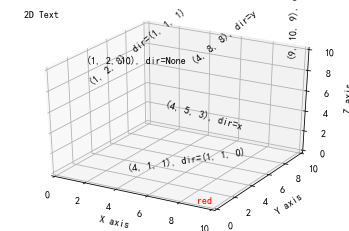

In [48]:
fig = plt.figure()
ax = fig.gca(projection='3d')
 
# Demo 1: zdir
zdirs = (None, 'x', 'y', 'z', (1, 1, 0), (1, 1, 1))
xs = (1, 4, 4, 9, 4, 1)
ys = (2, 5, 8, 10, 1, 2)
zs = (10, 3, 8, 9, 1, 8)
 
for zdir, x, y, z in zip(zdirs, xs, ys, zs):
    label = '(%d, %d, %d), dir=%s' % (x, y, z, zdir)
    ax.text(x, y, z, label, zdir)
 
# Demo 2: color
ax.text(9, 0, 0, "red", color='red')
 
# Demo 3: text2D
# Placement 0, 0 would be the bottom left, 1, 1 would be the top right.
ax.text2D(0.05, 0.95, "2D Text", transform=ax.transAxes)
 
# Tweaking display region and labels
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_zlim(0, 10)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
 
plt.show()

### 3d拼图

(-1.01, 1.01)

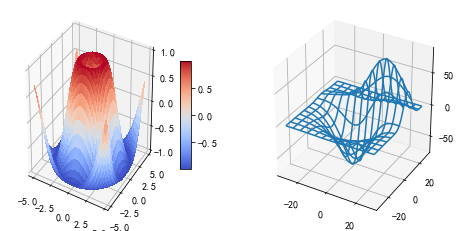

In [49]:
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
from matplotlib import cm
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))
 
# ===============
#  First subplot
# ===============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
 
# plot a 3D surface like in the example mplot3d/surface3d_demo
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X ** 2 + Y ** 2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)
fig.colorbar(surf, shrink=0.5, aspect=10)
 
# ===============
# Second subplot
# ===============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
 
# plot a 3D wireframe like in the example mplot3d/wire3d_demo
X, Y, Z = get_test_data(0.05)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
 
plt.show()

### 多边形
Axes3D.add_collection3d 函数用来向图形中添加3D集合对象。  
对于某些数据（例如降水量）来说，我们也可能希望通过多边形来了解其每个点的走势。  
下面这段代码通过多边形的形式展示了和上面柱状图一样的数据。  
Axes3D.add_collection3d 函数除了支持PolyCollection，还支持LineCollection和PatchCollection。  

Text(0.5, 0, 'Month')

(0, 12)

Text(0.5, 0, 'Year')

(2015, 2020)

Text(0.5, 0, 'Precipitation')

(0, 300)

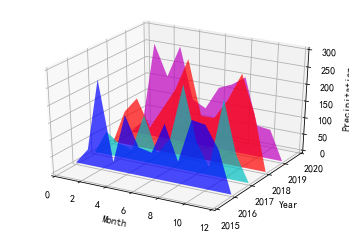

In [50]:
from matplotlib.collections import PolyCollection
# from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')

np.random.seed(59)
month = np.arange(0, 13)
years = [2016, 2017, 2018, 2019]

precipitation = []
for year in years:
    value = np.random.rand(len(month)) * 300
    value[0], value[-1] = 0, 0
    precipitation.append(list(zip(month, value)))

poly = PolyCollection(precipitation, facecolors=['b','c','r','m'])
poly.set_alpha(0.7)

ax.add_collection3d(poly, zs=years, zdir='y')
ax.set_xlabel('Month')
ax.set_xlim3d(0, 12)
ax.set_ylabel('Year')
ax.set_ylim3d(2015, 2020)
ax.set_zlabel('Precipitation')
ax.set_zlim3d(0, 300)

plt.show()

### 制作动图

Text(0.5, 0, 'X')

Text(0.5, 0, 'Y')

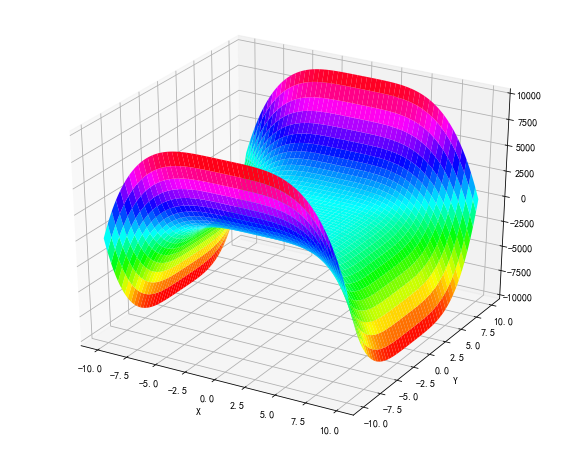

In [51]:
fig = plt.figure(figsize=(10, 8))
ax = fig.gca(projection='3d')

x = np.arange(-10, 10, 0.1)
y = np.arange(-10, 10, 0.1)
X, Y = np.meshgrid(x, y)

Z = np.add(-np.power(X, 4), np.power(Y, 4))

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.plot_surface(X, Y, Z, cmap=cm.hsv)
# 制作动图
# for angle in range(95, 180, 3):
#     ax.set_zlabel("Angle: " + str(angle))
#     ax.view_init(30, angle)
#     filename = "./" + str(angle) + ".png"
# #     plt.savefig(filename)
#     print("Save " + filename + " finish")